In [ ]:
import numpy as np, seaborn as sns, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
mpl.rcParams['figure.figsize'] = [16, 9]
import pickle

In [ ]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weather_2.csv')
df

,city,date,temperature,wind_speed,wind_direction,humidity,precipitation,visibility,surface_pressure,rain,snowfall,cloud_cover,uv_index,weather_code,latitude,longitude,wind_direction_cat,rain_cat,snowfall_cat,cloud_cover_cat
0,Abu Dhabi,2022-07-11 00:00:00,30.92,16.42,127.88,75.0,0.0,24140.0,995.54,0.0,0.0,100.0,0.00,3.0,24.38,54.50,SE,none,none,Overcast
1,Abu Dhabi,2022-07-11 01:00:00,31.02,15.91,127.65,74.0,0.0,24140.0,996.24,0.0,0.0,100.0,0.00,3.0,24.38,54.50,SE,none,none,Overcast
2,Abu Dhabi,2022-07-11 02:00:00,31.62,17.87,124.33,71.0,0.0,24140.0,997.04,0.0,0.0,100.0,0.00,3.0,24.38,54.50,SE,none,none,Overcast
3,Abu Dhabi,2022-07-11 03:00:00,31.72,21.44,139.09,71.0,0.0,24140.0,997.54,0.0,0.0,100.0,0.45,3.0,24.38,54.50,SE,none,none,Overcast
4,Abu Dhabi,2022-07-11 04:00:00,31.72,23.28,148.28,71.0,0.0,24140.0,998.04,0.0,0.0,100.0,1.70,3.0,24.38,54.50,SE,none,none,Overcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958683,Yamoussoukro,2025-07-11 19:00:00,20.82,3.10,305.54,56.0,0.0,68680.0,998.89,0.0,0.0,97.0,0.05,3.0,45.82,15.98,NW,none,none,Overcast
4958684,Yamoussoukro,2025-07-11 20:00:00,18.52,4.10,15.26,64.0,0.0,59420.0,999.16,0.0,0.0,37.0,0.00,1.0,45.82,15.98,NE,none,none,Partly Cloudy
4958685,Yamoussoukro,2025-07-11 21:00:00,17.47,3.67,348.69,64.0,0.0,59560.0,999.20,0.0,0.0,0.0,0.00,0.0,45.82,15.98,NW,none,none,Clear
4958686,Yamoussoukro,2025-07-11 22:00:00,16.22,3.22,333.44,73.0,0.0,43280.0,999.23,0.0,0.0,0.0,0.00,0.0,45.82,15.98,NW,none,none,Clear


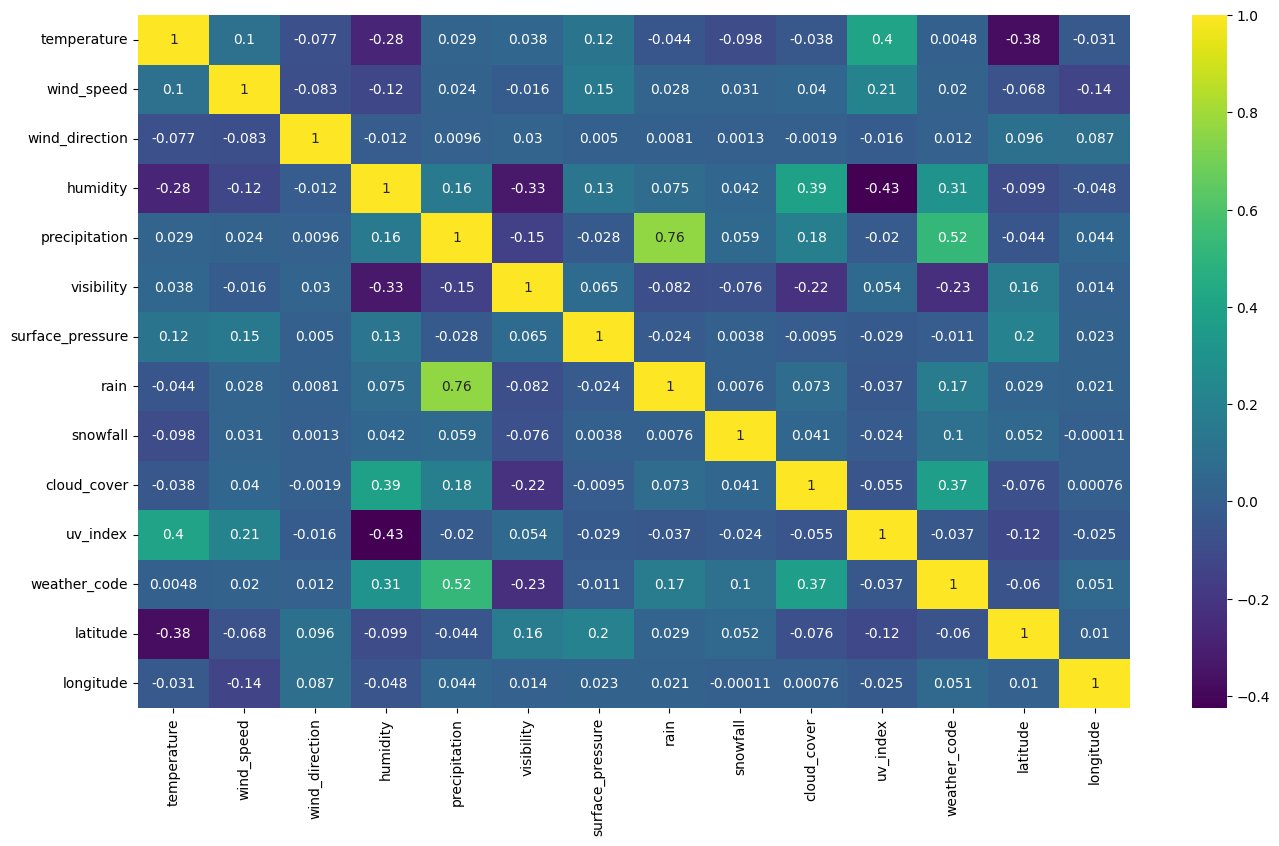

In [ ]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.tz_localize(None)

In [ ]:
unique_cities = df['city'].unique()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [ ]:
df['rain_cat'].value_counts()

,count
rain_cat,
none,4773676
light,184670
heavy,342


In [ ]:
cols = ['temperature', 'wind_speed', 'wind_direction', 'humidity',
            'precipitation', 'visibility', 'surface_pressure', 'cloud_cover', 'uv_index']
X = df[cols]

# Target: Convert 'rain_cat' to binary (0 = none, 1 = any rain)
y = (df['rain_cat'] != 'none').astype(int)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train.to_numpy()).float().to(device)
X_test_tensor = torch.from_numpy(X_test).float().to(device)
y_test_tensor = torch.from_numpy(y_test.to_numpy()).float().to(device)

In [ ]:
n_none = (y_train == 0).sum()
n_rain = (y_train == 1).sum()
total = len(y_train)
weight_none = total / (2 * n_none)
weight_rain = total / (2 * n_rain)
class_weights = torch.tensor([weight_none, weight_rain]).to(device)

In [ ]:
class WeatherDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
class WeatherClassifier(nn.Module):
    def __init__(self, dimension):
        super(WeatherClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(dimension, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
dimension = X_train.shape[1]
model = WeatherClassifier(dimension).to(device)
model

WeatherClassifier(
  (model): Sequential(
    (0): Linear(in_features=9, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss(reduction='none')
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
losses = []
for i in range(50):
    model.train()
    epoch_loss = 0
    for x_batch, y_batch in train_loader:
        y_batch = y_batch.unsqueeze(1)  # Reshape for BCE loss (same as original)
        yhat = model(x_batch)
        # Apply class weights to loss
        weights = class_weights[1] * y_batch + class_weights[0] * (1 - y_batch)
        loss = loss_fn(yhat, y_batch) * weights
        loss = loss.mean()  # Average loss over batch
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch {i+1}: {epoch_loss:.4f}')
    losses.append(epoch_loss)

Epoch 1: 18676.6731
Epoch 2: 25339.4831
Epoch 3: 27108.2549
Epoch 4: 25725.6476
Epoch 5: 31767.3504
Epoch 6: 35917.0854
Epoch 7: 31462.3352
Epoch 8: 32253.8353
Epoch 9: 32755.6500
Epoch 10: 36164.1352
Epoch 11: 36241.0450
Epoch 12: 32769.5936
Epoch 13: 37249.7736
Epoch 14: 34436.6879
Epoch 15: 32611.1080
Epoch 16: 33433.6736
Epoch 17: 35419.2603
Epoch 18: 30093.1488
Epoch 19: 34548.6508
Epoch 20: 35656.7092
Epoch 21: 37859.9940
Epoch 22: 38029.3202
Epoch 23: 40826.6990
Epoch 24: 36173.5861
Epoch 25: 36878.5877
Epoch 26: 34782.9363
Epoch 27: 40071.3609
Epoch 28: 47100.5771
Epoch 29: 36031.8262
Epoch 30: 36591.2982
Epoch 31: 42460.9522
Epoch 32: 44158.1222
Epoch 33: 45447.3251
Epoch 34: 39283.5650
Epoch 35: 45090.2488
Epoch 36: 43330.4800
Epoch 37: 39729.5486
Epoch 38: 36460.5065
Epoch 39: 41401.8266
Epoch 40: 40919.2681
Epoch 41: 40648.3565
Epoch 42: 35398.0091
Epoch 43: 42632.8734
Epoch 44: 39905.8882
Epoch 45: 40702.6312
Epoch 46: 36122.3249
Epoch 47: 37073.9618
Epoch 48: 38081.0785
E

In [ ]:
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor)
    preds = (preds > 0.5).float()  # Convert probabilities to binary predictions
    preds = preds.cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

In [ ]:
accuracy = accuracy_score(y_test_np, preds)
precision = precision_score(y_test_np, preds)
recall = recall_score(y_test_np, preds)
f1 = f1_score(y_test_np, preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9711
Precision: 0.5774
Recall: 0.8390
F1 Score: 0.6840


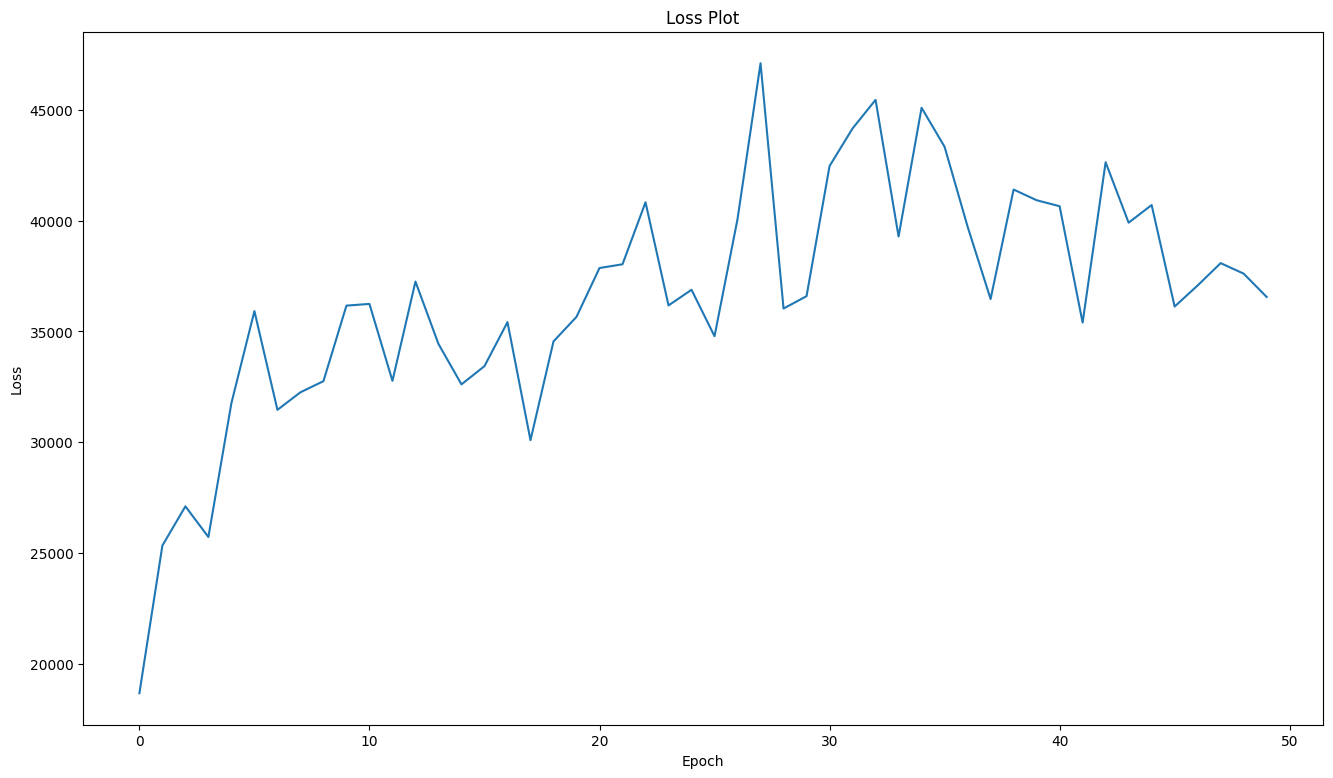

In [ ]:
plt.plot(losses)
plt.title("Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

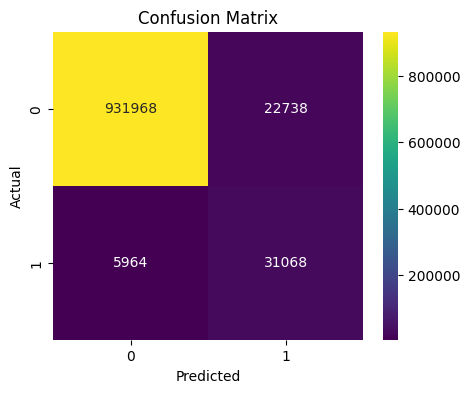

In [ ]:
cm = confusion_matrix(y_test_np, preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
with open('weather_classifier_model.pkl', 'wb') as f:
    pickle.dump(model.state_dict(), f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
from itertools import product

# Select features and target
features = ['temperature', 'wind_speed', 'wind_direction', 'humidity',
            'precipitation', 'visibility', 'surface_pressure', 'cloud_cover', 'uv_index']
X = df[features]
y = (df['rain_cat'] != 'none').astype(int)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train.to_numpy()).float().to(device)
X_test_tensor = torch.from_numpy(X_test).float().to(device)
y_test_tensor = torch.from_numpy(y_test.to_numpy()).float().to(device)

# Class weights for imbalance
n_none = (y_train == 0).sum()
n_rain = (y_train == 1).sum()
total = len(y_train)
weight_none = total / (2 * n_none)
weight_rain = total / (2 * n_rain)
class_weights = torch.tensor([weight_none, weight_rain]).to(device)

# Dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Define model with dropout
class WeatherClassifier(nn.Module):
    def __init__(self, input_dim, dropout_rate):
        super(WeatherClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Dropout(dropout_rate),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameter grid
param_grid = {
    'lr': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [15],
    'dropout_rate': [0.0, 0.2]
}
combinations = list(product(*param_grid.values()))
param_names = list(param_grid.keys())

best_f1 = 0
best_model_state = None
best_params = None

# Grid search training
for comb in combinations:
    params = dict(zip(param_names, comb))
    print(f"\n🔄 Training with: {params}")

    model = WeatherClassifier(X_train.shape[1], dropout_rate=params['dropout_rate']).to(device)
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    loss_fn = nn.BCELoss(reduction='none')
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)

    for epoch in range(params['epochs']):
        model.train()
        for x_batch, y_batch in train_loader:
            y_batch = y_batch.unsqueeze(1)
            yhat = model(x_batch)
            weights = class_weights[1] * y_batch + class_weights[0] * (1 - y_batch)
            loss = loss_fn(yhat, y_batch) * weights
            loss = loss.mean()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        preds = model(X_test_tensor)
        preds = (preds > 0.5).float().cpu().numpy()
        y_true = y_test_tensor.cpu().numpy()
        f1 = f1_score(y_true, preds)
        print(f"→ F1 Score: {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_model_state = model.state_dict()
            best_params = params

# Print best result
print("\n✅ Best F1 Score:", best_f1)
print("✅ Best Parameters:", best_params)

# Save model and scaler
with open('best_weather_classifier_model.pkl', 'wb') as f:
    pickle.dump(best_model_state, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Final model evaluation
final_model = WeatherClassifier(X_train.shape[1], best_params['dropout_rate']).to(device)
final_model.load_state_dict(best_model_state)
final_model.eval()
with torch.no_grad():
    final_preds = final_model(X_test_tensor)
    final_preds = (final_preds > 0.5).float().cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

# Print final metrics
acc = accuracy_score(y_test_np, final_preds)
prec = precision_score(y_test_np, final_preds)
rec = recall_score(y_test_np, final_preds)
f1 = f1_score(y_test_np, final_preds)
print(f"\n📊 Final Metrics with Best Model:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_np, final_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



🔄 Training with: {'lr': 0.001, 'batch_size': 32, 'epochs': 15, 'dropout_rate': 0.0}
→ F1 Score: 0.7004

🔄 Training with: {'lr': 0.001, 'batch_size': 32, 'epochs': 15, 'dropout_rate': 0.2}
